In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hcluster
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the required dataset
c_data = pd.read_csv('HP_Country-data.csv')
c_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
c_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Checking the percentage of missing values
round(100*(c_data.isnull().sum()/len(c_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
c_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
# understanding the data and checking for outliers using box-plots graphs

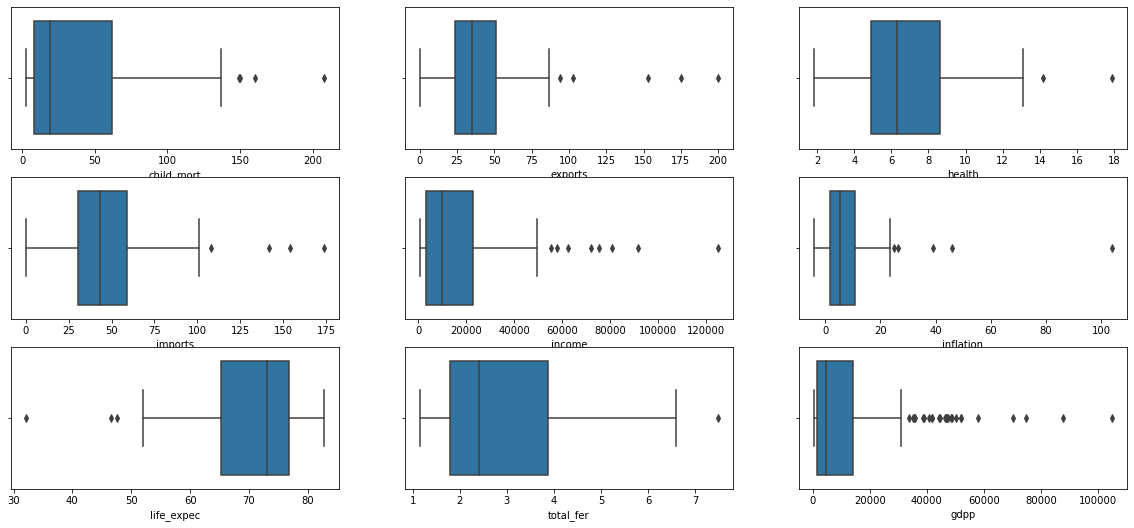

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(c_data.child_mort)
plt.subplot(4,3,2)
sns.boxplot(c_data.exports)
plt.subplot(4,3,3)
sns.boxplot(c_data.health)
plt.subplot(4,3,4)
sns.boxplot(c_data.imports)
plt.subplot(4,3,5)
sns.boxplot(c_data.income)
plt.subplot(4,3,6)
sns.boxplot(c_data.inflation)
plt.subplot(4,3,7)
sns.boxplot(c_data.life_expec)
plt.subplot(4,3,8)
sns.boxplot(c_data.total_fer)
plt.subplot(4,3,9)
sns.boxplot(c_data.gdpp)
plt.show()


In [9]:
#Looking at the data distribution we can see that there are some features that do indeed have outliers.
#For the purpose of this analysis, we may remoove some outliers
from scipy import stats

z = np.abs(stats.zscore(c_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532  1.138280  0.279088  0.082455  0.808245   0.157336   
1      0.538949  0.479658  0.097016  0.070837  0.375369   0.312347   
2      0.272833  0.099122  0.966073  0.641762  0.220844   0.789274   
3      1.759101  0.395501  0.688559  0.152886  0.830097   0.789274   
4      0.695634  0.160668  0.286894  0.497568  0.101732   0.601749   
..          ...       ...       ...       ...       ...        ...   
162    0.225578  0.200917  0.571711  0.240700  0.738527   0.489784   
163    0.526514  0.461363  0.695862  1.213499  0.033542   3.616865   
164    0.372315  1.130305  0.008877  1.380030  0.658404   0.409732   
165    0.448417  0.406478  0.597272  0.517472  0.658924   1.500916   
166    1.114951  0.150348  0.338015  0.662477  0.721358   0.590015   

     life_expec  total_fer      gdpp  
0      1.619092   1.902882  0.679180  
1      0.647866   0.859973  0.485623  
2      0.670423   0.038404  0.465376  
3  

In [10]:
# Removing the outliers
#Most of the outliers are in income per person,GDP per captia and Exports
c_data_outliers_removed = c_data[(z<3).all(axis=1)]

In [11]:
c_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
c_data.shape

(167, 10)

In [13]:
c_data_outliers_removed.shape

(153, 10)

In [14]:
a = c_data_outliers_removed.drop('country',axis =1)  
b = c_data_outliers_removed['country']

In [15]:
a.shape 

(153, 9)

In [16]:
b.shape

(153,)

In [17]:
a.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [18]:
b.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [19]:
#The dataset is not scaled, some values are much bigger then others
#Standardization of the dataset before performing PCA menthod on the dataset
#StandardScaler will change the data such the the mean will be 0 and variance will be 1.
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
a_scaled = scaler.fit_transform(a)

In [22]:
a_scaled[:4,:4]

array([[ 1.46183636, -1.41330427,  0.31809414, -0.04379952],
       [-0.56911214, -0.52600184, -0.08875965,  0.15011384],
       [-0.27385196, -0.01333821, -1.02886841, -0.75132124],
       [ 1.98061125, -0.41262431, -0.72866561, -0.13289484]])

In [23]:
a.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [24]:
a_scaled_new = pd.DataFrame(a_scaled,columns=a.columns)

In [25]:
a_scaled_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,1.980611,-0.412624,-0.728666,-0.132895,-0.986001,1.310315,-1.518785,1.618471,-0.715220
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


<AxesSubplot:>

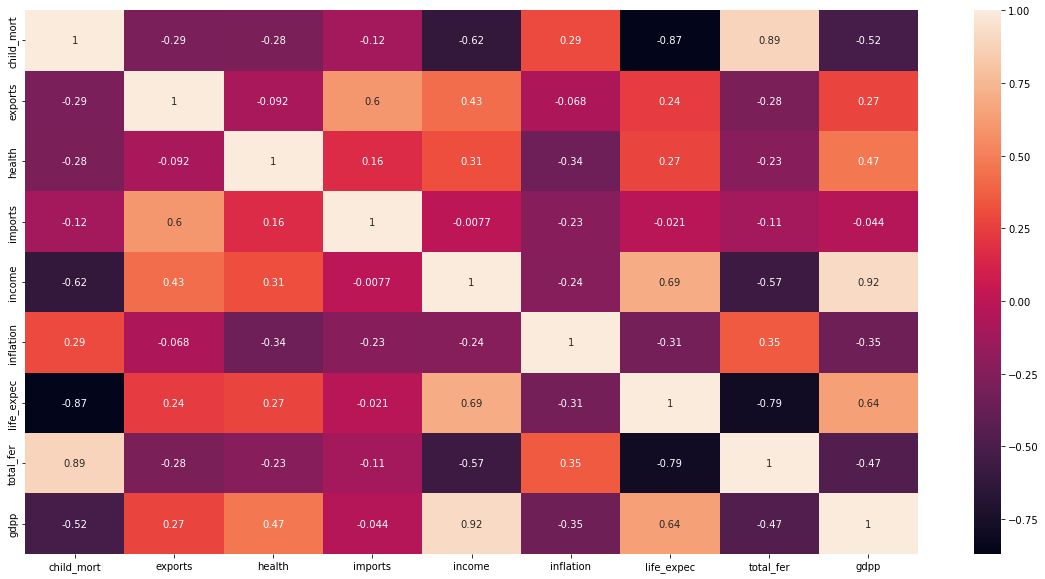

In [26]:
# Working on the correlation matrix to understand the interelation of these colums
plt.figure(figsize = (20,10))       
sns.heatmap(a_scaled_new.corr(),annot = True)

In [27]:
#There is significant co-relation amongst the columns

In [28]:
n_components = 4

In [29]:
# function to perform principal component analysis
def run_pca(n_components,a_scaled_new):

  # initialize PCA
  pca = PCA(n_components=n_components)

  # call pca.fit_transform function on data
  principal_components = pca.fit_transform(a_scaled_new)

  # convert output to dataframe for analysis
  principal_df = pd.DataFrame(data = principal_components)
  return principal_df

In [30]:
# call pca function to get the final PCA dataframe
final_df = run_pca(n_components,a_scaled_new)
print(final_df.head())

          0         1         2         3
0 -3.130806 -0.471117  1.336274  0.641322
1  0.551781 -0.230632 -0.071234 -1.377036
2 -0.356257 -0.542354 -1.818159 -0.216783
3 -3.383922  0.153543 -0.169265  1.042271
4  1.308957  0.612033 -0.065287 -0.687559


In [31]:
from sklearn.decomposition import IncrementalPCA

In [32]:
pca_final = IncrementalPCA(n_components)

In [33]:
a_pca_final = pca_final.fit_transform(a_scaled)

In [34]:
print(a_pca_final.shape)

(153, 4)


In [35]:
#Kmeans 
#Load libraries for Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

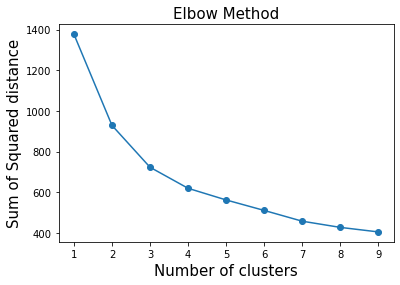

In [36]:
# First we initialize k points called means randomly
# plot elbow curve
#We repeat the process for a given number of iteartions and at the end,we have our clusters
e=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(a_scaled_new)
    e.append(kmean.inertia_)
    
plt.plot(K,e,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [59]:
#As we see the elbos bend is at 3
#Since, the value is only decreasing little between 3 and 5, 3 is chosen as the index
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
b_c=kmeans.fit(a_scaled_new)


In [61]:
kmeans_df = pd.DataFrame(c_data_outliers_removed)
kmeans_df['cluster_kmeans'] = kmeans.labels_
kmeans_df.head()
#addingKmeans labels in kmeans_df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster,cluster_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648,2,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


In [38]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    78
2    47
1    28
dtype: int64

In [39]:
#Now we are going to check how our model is,using Silhouette Coefficient

In [40]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3

metrics.silhouette_score(a_scaled_new, kmeans.labels_)


0.27355544564743

In [41]:
#Hierarchical Clustering

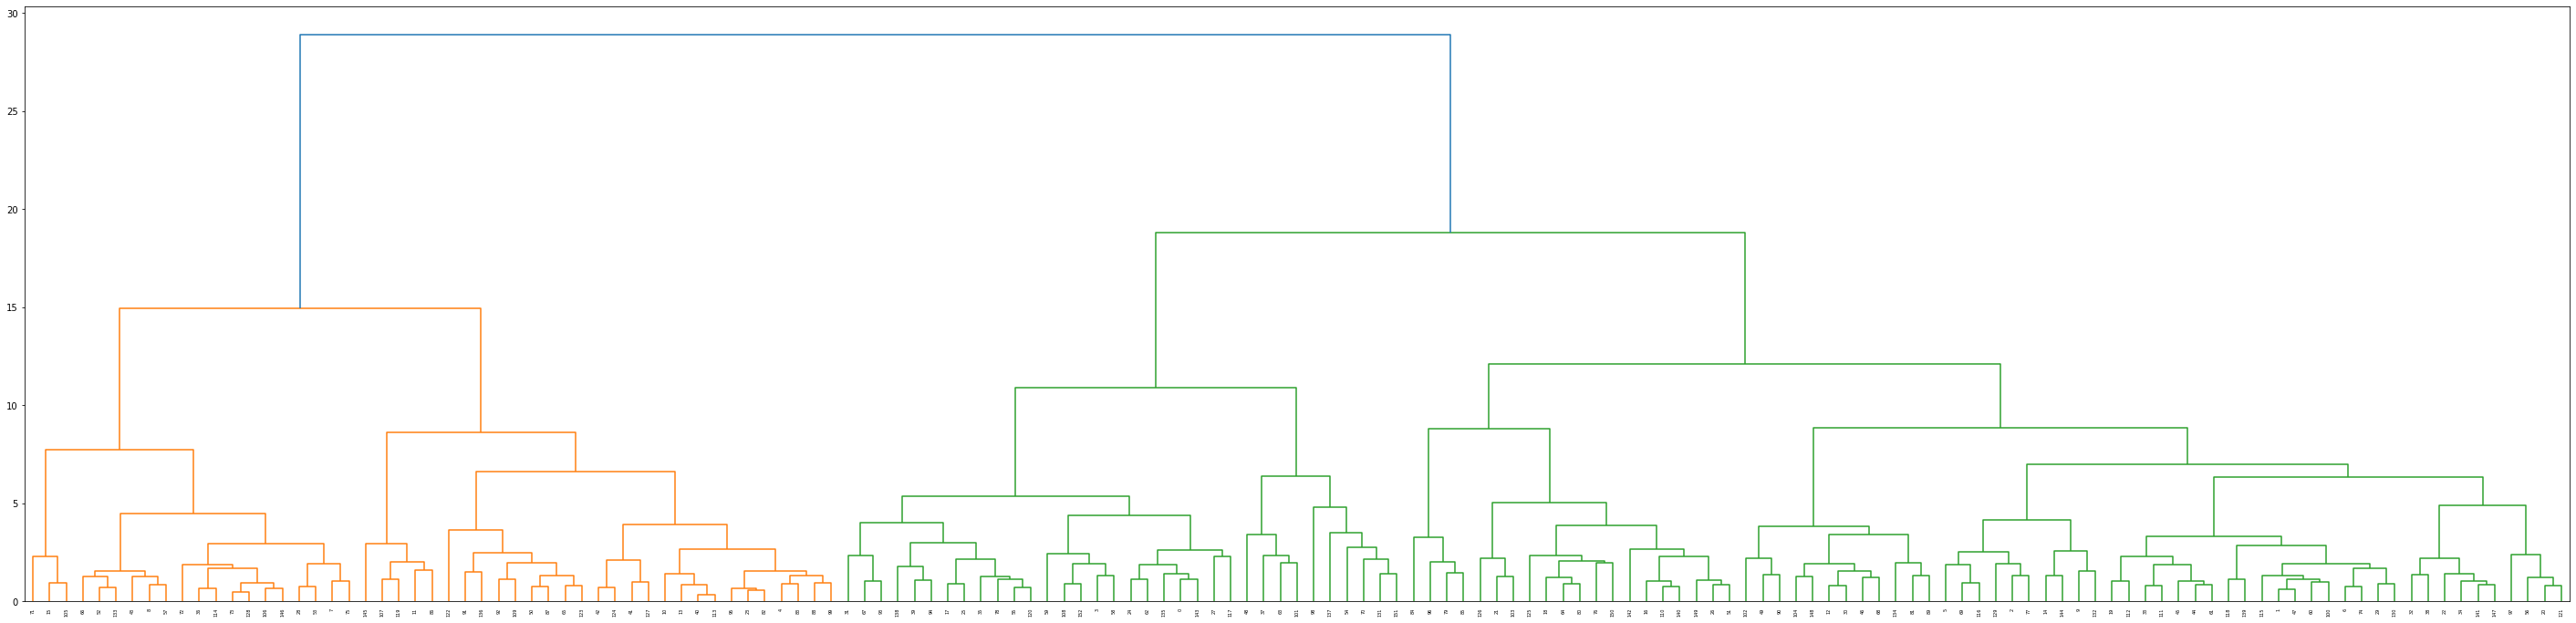

In [42]:
#plotting dendogram
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(a_scaled_new,method='ward'))

In [43]:
#By looking at this dendrogram, it can be seen that the optimal number of cluster is 3.
from sklearn.cluster import AgglomerativeClustering

In [44]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(a_scaled_new)
hcluster_label = hcluster.labels_

In [45]:
hcluster_df = pd.DataFrame(c_data_outliers_removed)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [68]:
metrics.silhouette_score(a_scaled_new, hcluster_label)

0.2218001296737724

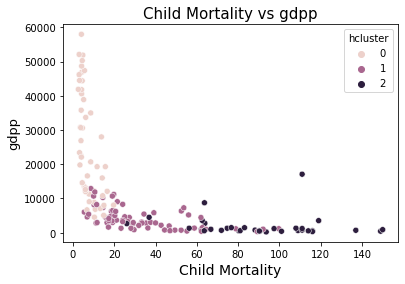

In [50]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(hcluster_df['child_mort'],hcluster_df['gdpp'],hue='hcluster',data=hcluster_df)
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=14)
plt.ylabel("gdpp", fontsize=13)
plt.show()

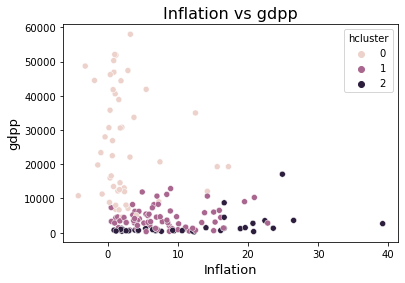

In [49]:
#visulazing hcluster results
sns.scatterplot(hcluster_df['inflation'],hcluster_df['gdpp'],hue='hcluster',data=hcluster_df)
plt.title("Inflation vs gdpp", fontsize=16)
plt.xlabel("Inflation", fontsize=13)
plt.ylabel("gdpp", fontsize=13)
plt.show()

In [ ]:
#Ngo wants to help countries that are in the direst need of aid. So this category would be Cluster No 2.
a_scaled_new['cluster_kmeans'] = kmeans.labels_

<AxesSubplot:xlabel='income', ylabel='child_mort'>

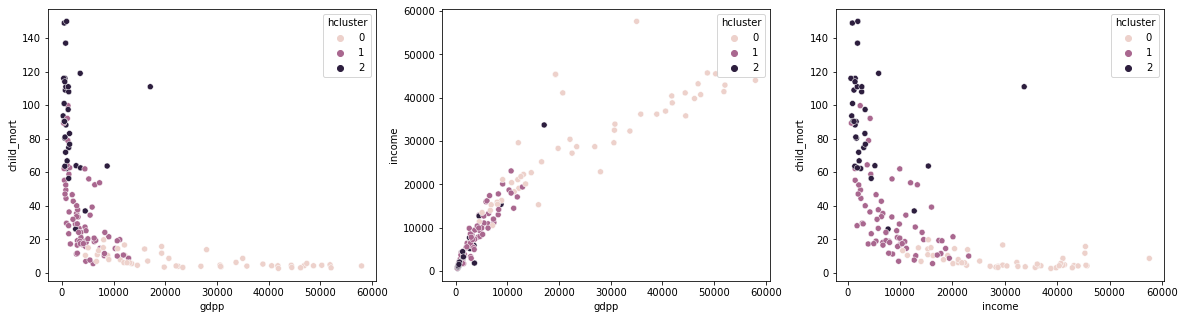

In [53]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

plt.subplot(1,3,1)
sns.scatterplot(data=hcluster_df, x="gdpp", y="child_mort", hue="hcluster")

plt.subplot(1,3,2)
sns.scatterplot(data=hcluster_df, x="gdpp", y="income", hue="hcluster")

plt.subplot(1,3,3)
sns.scatterplot(data=hcluster_df, x="income", y="child_mort", hue="hcluster")

In [55]:
#Cluster No 0 has low child mont, high gdpp and high income.
#Cluster No 1 has medium child_mont, medium gdpp and medium income.
#Cluster No 2 has high child_mont, low gdpp and low income.
#Cluster 2 is in direct need
#Results of Hierarchical Clustering are the countries the NGO should help first
hcluster_df[hcluster_df['hcluster'] == 2].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster
28,Cameroon,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2
60,Greece,116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2
99,Mauritania,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2
32,Chad,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2
116,Pakistan,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,2
63,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,2
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,2
56,Gambia,80.3,23.80,5.69,42.7,1660,4.30,65.5,5.71,562,2
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563,2


<AxesSubplot:xlabel='income', ylabel='child_mort'>

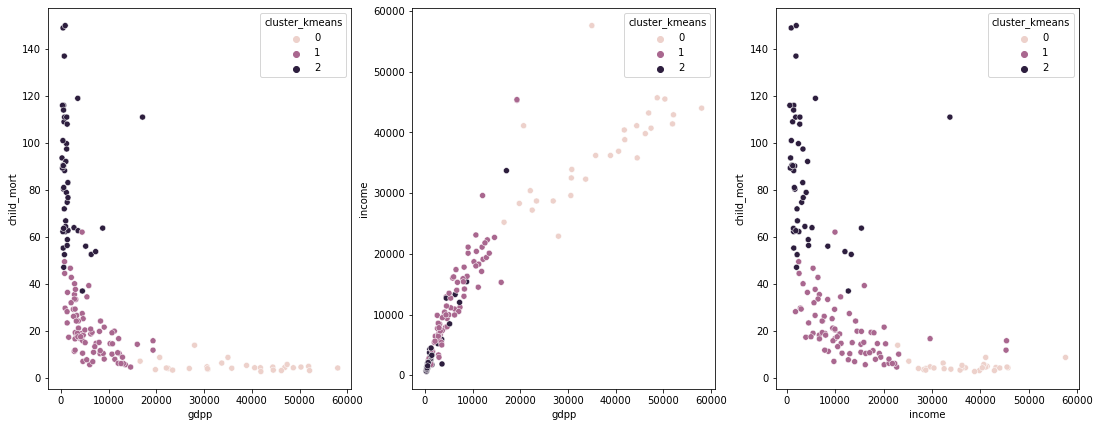

In [67]:
fig, axs = plt.subplots(1,3, figsize = (25,7))

plt.subplot(1,4,1)
sns.scatterplot(data=kmeans_df, x="gdpp", y="child_mort", hue="cluster_kmeans")

plt.subplot(1,4,2)
sns.scatterplot(data=kmeans_df, x="gdpp", y="income", hue="cluster_kmeans")

plt.subplot(1,4,3)
sns.scatterplot(data=kmeans_df, x="income", y="child_mort", hue="cluster_kmeans")

In [64]:
#Cluster No 0 has medium child_mont, medium gdpp and medium income.
#Cluster No 1 has low child mont, high gdpp and high income.
#Cluster No 2 has high child_mont, low gdpp and low income.
#Cluster 2 is in direct needCluster No 0 has low child mont, high gdpp and high income.
Cluster No 1 has medium child_mont, medium gdpp and medium income.
Cluster No 2 has high child_mont, low gdpp and low income.
#Results for K-means Clustering are the countries NGO should help first
kmeans_df[kmeans_df['cluster_kmeans'] == 2].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster,cluster_kmeans
28,Cameroon,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2,2
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,2
60,Greece,116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2,2
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1,2
99,Mauritania,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2,2
32,Chad,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2,2
116,Pakistan,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2,2
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1,2
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,2,2
63,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,2,2


In [ ]:
#The aim is to choose a cluster of top 10 countries which have lowest gdpp, lowest income, and highest child_mort.
#Most countries in both Hierachial and kmeans are similar but 
#I feel the advantage of hierarchical clustering is that it is easy to understand and implement. The dendrogram output of the algorithm can be used to understand the groups in the data
#But the silhouette score of kmeans is better so I feel Kmeans results is the one NGO should prefer